In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [3]:
dc_listings = pd.read_csv("dc_airbnb.csv")

In [4]:
dc_listings

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD
5,100%,100%,1,4,Entire home/apt,2.0,1.0,4.0,$99.00,NaN,NaN,1,1125,0,38.862486,-77.015062,Washington,20024,DC
6,100%,NaN,1,4,Entire home/apt,2.0,2.0,2.0,$100.00,$50.00,$150.00,3,1125,0,38.974738,-77.027076,Washington,20012,DC
7,100%,NaN,1,2,Entire home/apt,1.0,1.0,1.0,$100.00,NaN,NaN,1,1125,0,38.941486,-76.968485,Mount Rainier,20712,MD
8,94%,99%,8,2,Private room,1.0,1.5,1.0,$38.00,NaN,NaN,2,180,1,38.880105,-76.919031,Capitol Heights,20743,MD
9,100%,100%,9,2,Private room,1.0,NaN,1.0,$71.00,$10.00,NaN,2,365,4,38.975592,-77.010713,Takoma Park,20912,MD


In [7]:
#create distance column to find nearing data sets
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x - 3))
print(dc_listings['distance'].value_counts)

#eliminates bias by data roder
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings = dc_listings.sort_values('distance')
print(dc_listings.iloc[0:10]['price'])

<bound method IndexOpsMixin.value_counts of 577      0
2166     0
3631     0
71       0
1011     0
380      0
943      0
3107     0
1499     0
625      0
1309     0
1252     0
1744     0
2334     0
749      0
1141     0
1855     0
1823     0
1040     0
1791     0
2055     0
2622     0
334      0
2528     0
963      0
2282     0
976      0
306      0
492      0
176      0
        ..
1885     9
1326     9
1878     9
1656     9
3305     9
1879     9
2995     9
542      9
1875     9
529      9
571     10
3524    10
562     11
1403    11
1658    11
685     11
2106    12
2688    12
1850    12
2757    12
1806    12
657     12
1594    13
611     13
2560    13
1596    13
1818    13
1402    13
763     13
1224    13
Name: distance, Length: 3723, dtype: int64>
577     185.0
2166    180.0
3631    175.0
71      128.0
1011    115.0
380     219.0
943     125.0
3107    250.0
1499     94.0
625     150.0
Name: price, dtype: float64


In [5]:
no_comma = dc_listings['price'].str.replace(',', '')
no_dollar = no_comma.str.replace('$', '')
dc_listings['price'] = no_dollar.astype('float')

In [8]:
#for 3 people per night price
mean_price = dc_listings.iloc[:5]['price'].mean()
print(mean_price)

156.6


In [9]:
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    predict_price = temp_df.iloc[:5]['price'].mean()
    return predict_price

In [10]:
acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)

print(acc_one)
print(acc_two)
print(acc_four)

78.8
126.0
197.6


In [11]:
#evaluating model with a training set(75%) and a test set(25%) of the data
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

#error metric 
#MAE mean absolute error 
#(how far off the prediction is in either the positive or negative direction.)
test_df['error'] = np.absolute(test_df['predicted_price'] - test_df['price'])
mae = test_df['error'].mean()
print(mae)
#MSE mean squred error (make the error values clear to observe)
test_df['squred_error'] = (test_df['predicted_price'] - test_df['price'])**2
mse = test_df['squred_error'].mean()
print(mse)
#RMSE root mean squared error (base unit)
rmse = mse ** (1/2)
print(rmse)

96.3230934479051
46289.76567132115
215.15056511968808


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [13]:
'''
improving the k-nearest model by increasing the number of attributes the model
uses to calculate similarity when ranking the closest neighbors
1. non-numerical values (e.g. city or state)
Euclidean distance equation expects numerical values
2. missing values
distance equation expects a value for each observation and attribute
3. non-ordinal values (e.g. latitude or longitude)
ranking by Euclidean distance doesn't make sense if all attributes aren't 
ordinal
'''

dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 577 to 1224
Data columns (total 20 columns):
host_response_rate      3289 non-null object
host_acceptance_rate    3109 non-null object
host_listings_count     3723 non-null int64
accommodates            3723 non-null int64
room_type               3723 non-null object
bedrooms                3702 non-null float64
bathrooms               3696 non-null float64
beds                    3712 non-null float64
price                   3723 non-null float64
cleaning_fee            2335 non-null object
security_deposit        1426 non-null object
minimum_nights          3723 non-null int64
maximum_nights          3723 non-null int64
number_of_reviews       3723 non-null int64
latitude                3723 non-null float64
longitude               3723 non-null float64
city                    3723 non-null object
zipcode                 3714 non-null object
state                   3723 non-null object
distance                3723 non-nu

In [14]:
'''
room-tyep, city, state contains non-numerical values
latitude, longitude, zipcode contain non-ordinal values
host_response_rate, host_acceptance_rate, host_listings_count cannot be used
as it is hard to group living sWpaces to the hosts themselves
'''

#remove these columns
dc_listings = dc_listings.drop(['room_type', 'city', 'state', 'latitude', 
                                'longitude', 'zipcode', 'host_acceptance_rate',
                                'host_listings_count', 'host_response_rate'], 
                                axis = 1)

In [15]:
#cleaning_fee cloumn has 37.3% rows missing and 
#security_deposit coulmn has 61.7% rows missing. It is best to remove them.
#for the rest of the remaining columns, delete missing rows.
dc_listings = dc_listings.drop(['cleaning_fee', 'security_deposit'], axis = 1)
dc_listings = dc_listings.dropna(axis = 0)
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 577 to 1224
Data columns (total 9 columns):
accommodates         3671 non-null int64
bedrooms             3671 non-null float64
bathrooms            3671 non-null float64
beds                 3671 non-null float64
price                3671 non-null float64
minimum_nights       3671 non-null int64
maximum_nights       3671 non-null int64
number_of_reviews    3671 non-null int64
distance             3671 non-null int64
dtypes: float64(4), int64(5)
memory usage: 286.8 KB


In [16]:
#normalize the listings by using x = x - x.mean() / x.std
normalized_listings = (dc_listings - dc_listings.mean())/(dc_listings.std())
normalized_listings['price'] = dc_listings['price']
print(normalized_listings.head(3))

      accommodates  bedrooms  bathrooms      beds  price  minimum_nights  \
577      -0.097589 -0.249467  -0.439151  0.297345  185.0       -0.065038   
2166     -0.097589 -0.249467  -0.439151 -0.546858  180.0       -0.341375   
3631     -0.097589 -0.249467  -0.439151  0.297345  175.0        0.211298   

      maximum_nights  number_of_reviews  distance  
577        -0.016604          -0.482505 -0.996634  
2166       -0.016604          -0.174671 -0.996634  
3631       -0.016604          -0.482505 -0.996634  


In [17]:
#using two attributes from the normalized listing (accomodates and bathrooms)
#to calculate euclidean distance. First try first and fifth rows.
from scipy.spatial import distance

first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]
fifth_listing = normalized_listings.iloc[4][['accommodates', 'bathrooms']]

first_fifth_distance = distance.euclidean(first_listing, fifth_listing)

print(first_fifth_distance)

0.0


In [18]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates', 'bathrooms']

knn = KNeighborsRegressor(n_neighbors = 5, algorithm = 'brute')
train_target = train_df['price']
knn.fit(train_df[train_columns], train_target)

predictions = knn.predict(test_df[train_columns])

#mse and rmse
from sklearn.metrics import mean_squared_error

train_columns = ['accommodates', 'bathrooms']
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute', metric='euclidean')
knn.fit(train_df[train_columns], train_df['price'])
predictions = knn.predict(test_df[train_columns])

two_features_mse = mean_squared_error(test_df['price'], predictions)
two_features_rmse = two_features_mse ** (1/2)
print(two_features_mse)
print(two_features_rmse)

45815.06916951081
214.04454949732033


In [19]:
#using four features
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

knn.fit(train_df[features], train_df['price'])
four_predictions = knn.predict(test_df[features])

four_mse = mean_squared_error(four_predictions, test_df['price'])
four_rmse = four_mse ** (1/2)
print(four_mse)
print(four_rmse)

train_columns = train_df.columns.tolist()
train_columns.remove('price')

43142.38402730375
207.70744817483978


In [20]:
#using all the features
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5, algorithm = 'brute')
knn.fit(train_df[train_columns], train_df['price'])
all_features_predictions = knn.predict(test_df[train_columns])

from sklearn.metrics import mean_squared_error

all_features_mse = mean_squared_error(all_features_predictions, test_df['price'])
all_features_rmse = all_features_mse ** (1/2)
print(all_features_mse)
print(all_features_rmse)

45659.5055745165
213.68084980764303


[26383.244596131968, 15152.84755403868, 14668.32890911389, 16079.745093856654, 14233.64313993174, 13781.359025407659, 13932.903995727982, 14015.416293373151, 14040.643997808958, 14214.452400455062, 14323.282373847065, 14588.854711793701, 14576.310270546817, 14573.683493533936, 14642.491240045507, 14687.59449214306, 14719.012451236267, 14725.675413278275, 14780.722616672812, 14755.384158134244]


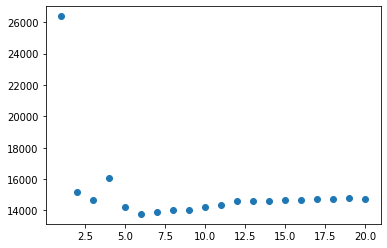

In [23]:
'''
The RMSE value increased to 125.1 when using all the features.
Using more features does not guarentee imporve prediction accuracy.
We will need to select the relevant attributes the model uses 
to calculate similarity when ranking the closest neighbors. (feature selection)
'''

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
#import new test and training sets.
import pandas as pd

train_df = pd.read_csv('dc_airbnb_train.csv')
test_df = pd.read_csv('dc_airbnb_test.csv')

#try various k values (1 - 20)
hyper_params = [i for i in range(1, 21)]
    
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

mse_values = []
train_columns = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm = 'brute')
    knn.fit(train_df[train_columns], train_df['price'])
    predictions = knn.predict(test_df[train_columns])
    mse_values.append(mean_squared_error(predictions, test_df['price']))
print(mse_values)

#it seems like 6 is the most optimal k-value.
plt.scatter(hyper_params, mse_values)
plt.show()

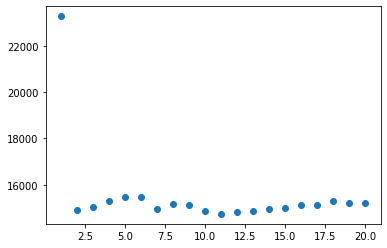

In [24]:
#using all the features
hyper_params = [x for x in range(1,21)]
mse_values = list()

train_columns = train_df.columns.tolist()
train_columns.remove('price')
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm = 'brute')
    knn.fit(train_df[train_columns], train_df['price'])
    predictions = knn.predict(test_df[train_columns])
    mse_values.append(mean_squared_error(predictions, test_df['price']))
    
    
#seems like 11 is the best k-value.    
plt.scatter(hyper_params, mse_values)
plt.show()

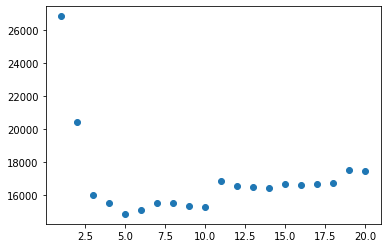

In [22]:
#try to return the lowest values
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i, algorithm = 'brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    two_mse_values.append(mean_squared_error(predictions, test_df['price']))

plt.scatter(hyper_params, two_mse_values)
plt.show()

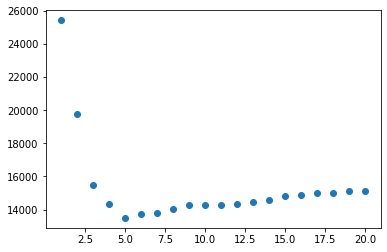

In [25]:
two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k, mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k + 1
        
two_hyp_mse[two_lowest_k] = two_lowest_mse

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)

plt.scatter(hyper_params, three_mse_values)
plt.show()

In [26]:
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

for k,mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1
        
three_hyp_mse[three_lowest_k] = three_lowest_mse

print(two_hyp_mse)
print(three_hyp_mse)

{5: 14875.319590443689}
{5: 13494.16850967008}


In [27]:
'''Holdout validation technique
splitting the full dataset into 2 partitions: a training set ,a test set.
training the model on the training set,
using the trained model to predict labels on the test set,
computing an error metric to understand the model's effectiveness,
switch the training and test sets and repeat, average the errors.
In holdout validation, we usually use a 50/50 split instead of the 75/25 split
from train/test validation. This way, we remove the number of observations as
a potential source of variation in our model performance.
'''

import numpy as np
import pandas as pd

dc_listings = pd.read_csv("dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)

split_one = dc_listings.iloc[:1862].copy()
split_two = dc_listings.iloc[1862:].copy()

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

knn = KNeighborsRegressor()
knn.fit(train_one[['accommodates']], train_one['price'])
predictions = knn.predict(test_one[['accommodates']])
one_mse = mean_squared_error(predictions, test_one['price'])
iteration_one_rmse = one_mse ** (1/2)

knn.fit(train_two[['accommodates']], train_two['price'])
predictions = knn.predict(test_two[['accommodates']])
two_mse = mean_squared_error(predictions, test_two['price'])
iteration_two_rmse = two_mse ** (1/2)

avg_rmse = np.mean([iteration_one_rmse, iteration_two_rmse])

dc_listings.loc[dc_listings.index[0:745], "fold"] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

print(dc_listings['fold'].value_counts())
print(dc_listings['fold'].isnull().sum())

5.0    745
2.0    745
1.0    745
4.0    744
3.0    744
Name: fold, dtype: int64
0


In [28]:
#hold out fold number one and set it to a test set.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()
train_iteration_one = dc_listings[dc_listings['fold'] != 1]
test_iteration_one = dc_listings[dc_listings['fold'] == 1].copy()
knn.fit(train_iteration_one[['accommodates']], train_iteration_one['price'])
predictions = knn.predict(test_iteration_one[['accommodates']])
iteration_one_mse = mean_squared_error(predictions, test_iteration_one['price'])
iteration_one_rmse = iteration_one_mse ** (1/2)

# Use np.mean to calculate the mean.
import numpy as np
fold_ids = [1,2,3,4,5]

def train_and_validate(df, folds):
    rmses = []
    for i in folds:
        train = df[df['fold'] != i]
        test = df[df['fold'] == i]         
        knn = KNeighborsRegressor()
        knn.fit(train[['accommodates']], train['price'])
        predictions = knn.predict(test[['accommodates']])
        mse = mean_squared_error(predictions, test['price'])
        rmses.append(mse ** (1/2))
    return rmses

rmses = train_and_validate(dc_listings, fold_ids)
avg_rmse = np.mean(rmses)
print(rmses)
print(avg_rmse)

#using sklearn instead the function I wrote.
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(5, shuffle = True, random_state = 1)
knn = KNeighborsRegressor()

mses = cross_val_score(knn, dc_listings[['accommodates']], dc_listings['price'], scoring = 'neg_mean_squared_error', cv = kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)

print(rmses)
print(avg_rmse)

[112.04826596623559, 144.38561957805769, 124.88396829711334, 136.89503611883998, 112.45994078728297]
126.13456614950594
[168.28866603 117.600042   150.89160819  96.36311228 111.94991968]
129.01866963719164


In [29]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  133.39155832923973 std RMSE:  11.086603336206089
5 folds:  avg RMSE:  129.01866963719164 std RMSE:  26.49026525380437
7 folds:  avg RMSE:  128.2563631358857 std RMSE:  24.433778651168502
9 folds:  avg RMSE:  127.32586680970088 std RMSE:  37.14784717325374
10 folds:  avg RMSE:  125.76801286044285 std RMSE:  34.17044630953882
11 folds:  avg RMSE:  128.05794633376306 std RMSE:  28.189791000247233
13 folds:  avg RMSE:  135.19672255133156 std RMSE:  37.393562781262155
15 folds:  avg RMSE:  129.36948920791744 std RMSE:  32.19005631512455
17 folds:  avg RMSE:  129.95026068075245 std RMSE:  42.23205089616785
19 folds:  avg RMSE:  123.23092426546866 std RMSE:  36.25629204751065
21 folds:  avg RMSE:  123.74230115930078 std RMSE:  40.953451986202275
23 folds:  avg RMSE:  124.80660657221455 std RMSE:  44.4282428992255
